In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
#reading data from train.csv in dataset folder 
def read_data(file_path):    
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"Error reading file: {str(e)}")
        return None

In [5]:
# Read the training data
train_data = read_data('dataset/train.csv')
if train_data is not None:
    print("Data loaded successfully!")
    print(train_data.head())

Data loaded successfully!
   id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2

In [16]:
#Analyze the data
print("<----------------------------------- Data Information ----------------------------------->")
print(train_data.info())
print("<----------------------------------- Data Description ----------------------------------->")
print(train_data.describe())
print("<----------------------------------- Null Values ----------------------------------->")
print(train_data.isnull().sum())
print("<----------------------------------- Duplicated Values ----------------------------------->")
print(train_data.duplicated().sum()) # no duplicated values
print("<----------------------------------- Data Shape ----------------------------------->")
print(train_data.shape)
#Check the distribution of the target variable
print("<----------------------------------- Distribution of the Target Variable ----------------------------------->")
print(train_data['Depression'].value_counts())



<----------------------------------- Data Information ----------------------------------->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                              

e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na',

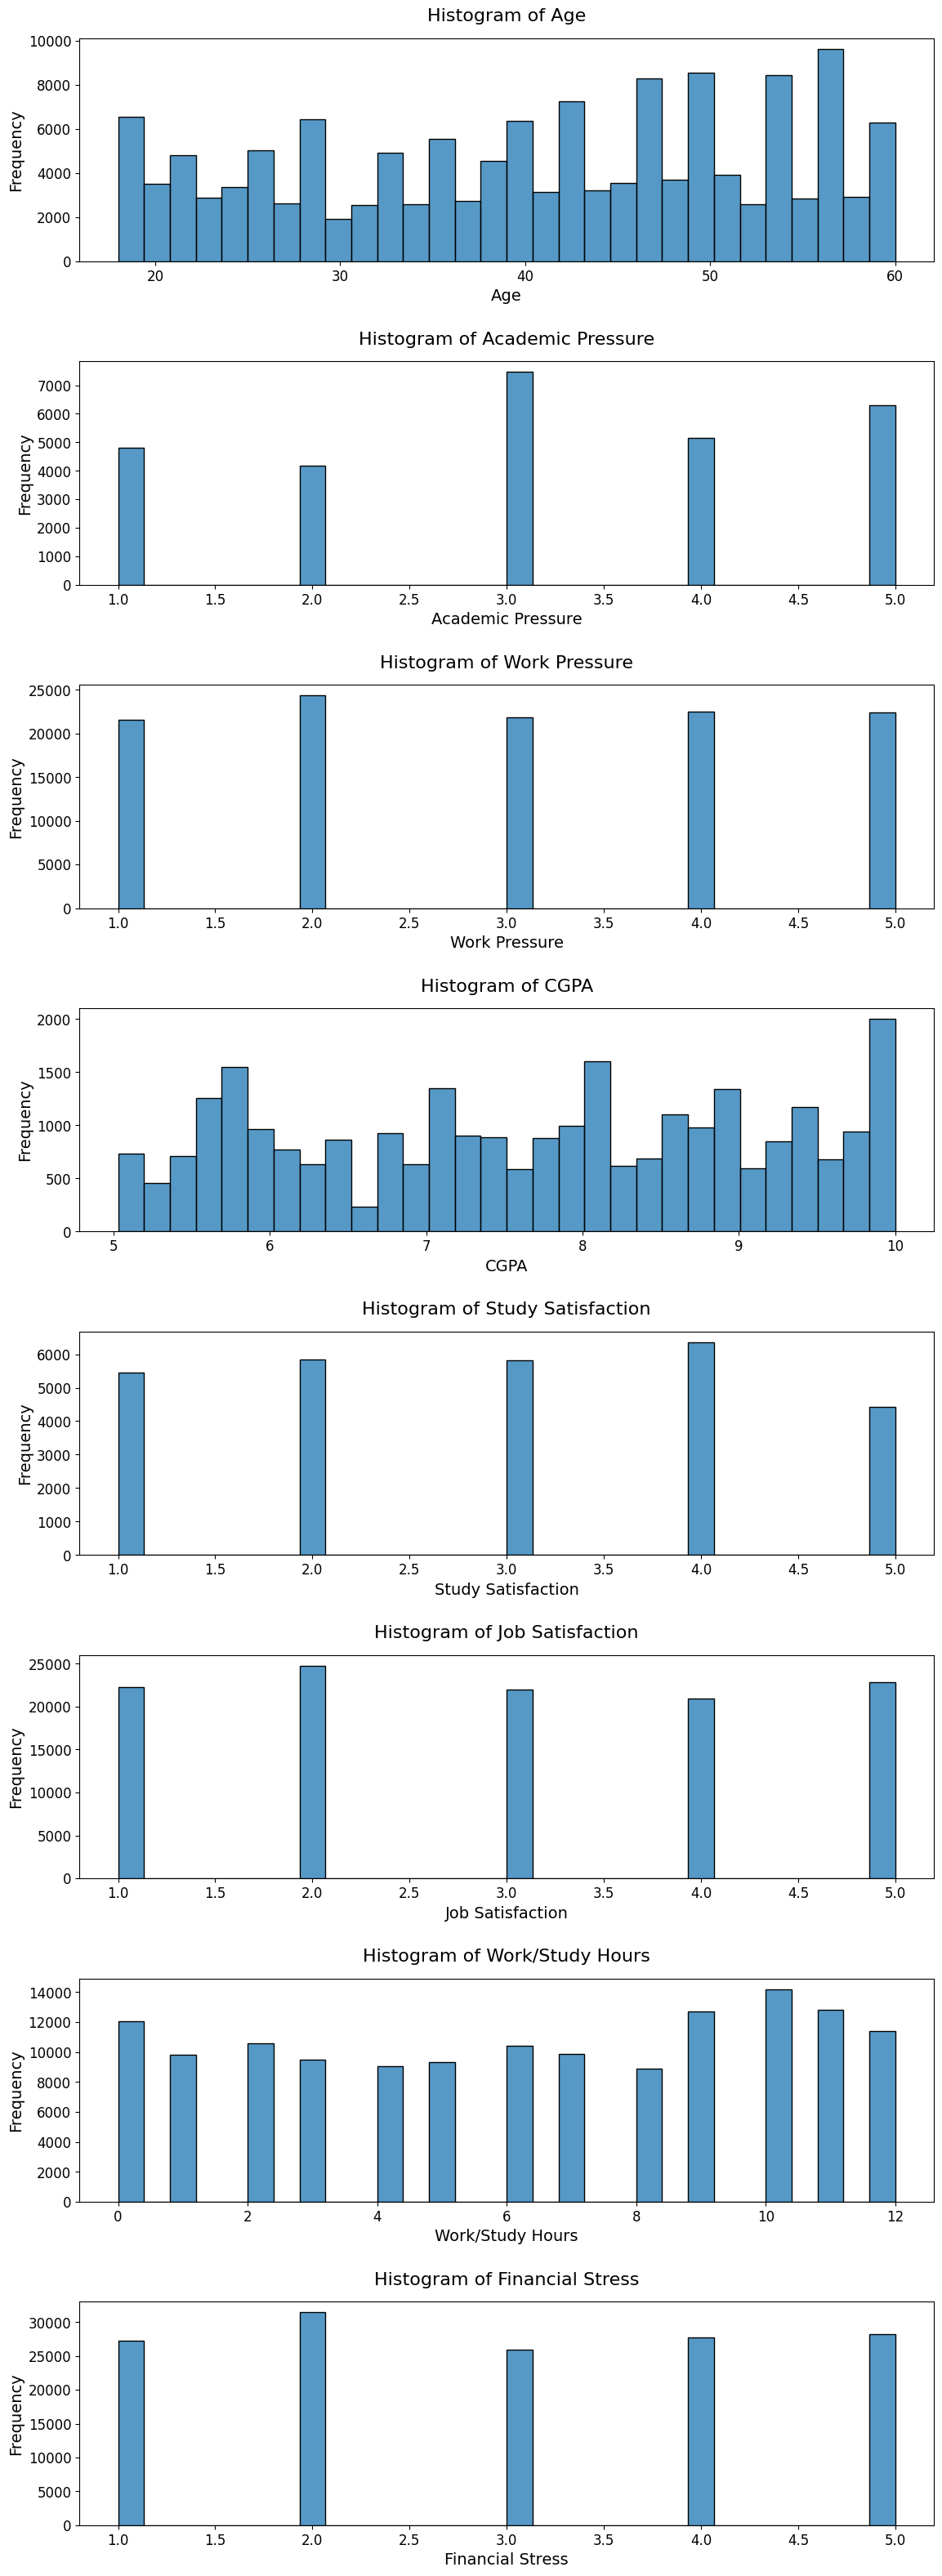

In [41]:
# Data Visualization

numerical_features = train_data.select_dtypes(include=[float, int]).columns
numerical_features = [feature for feature in numerical_features if feature != 'id' and feature != 'Depression']

plt.figure(figsize=(12, len(numerical_features)*4))

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams.update({'axes.titlesize': 16})

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)
    sns.histplot(train_data[feature], bins=30)
    plt.title(f'Histogram of {feature}', pad=15)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout(pad=2.0)  
plt.show()




e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\SSD\Anaco

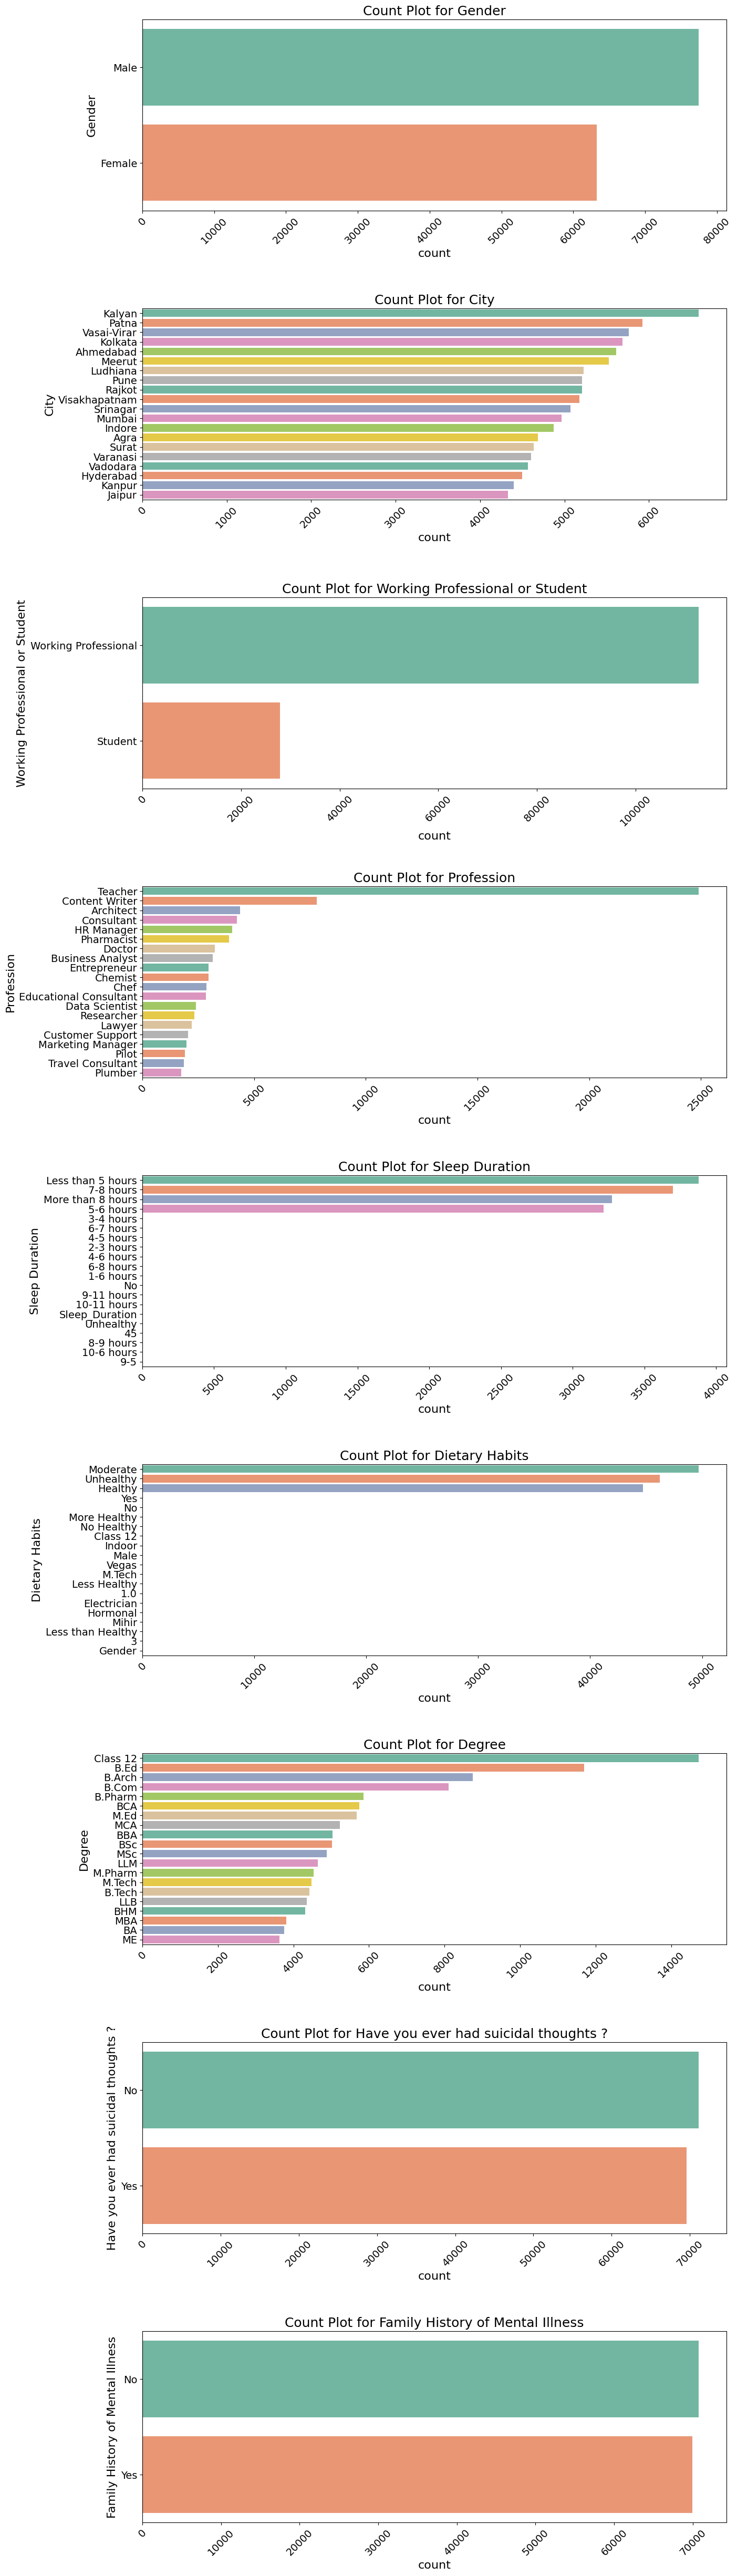

In [52]:
# visualize the categorical features
categorical_features = train_data.select_dtypes(include=["object"]).columns

plt.figure(figsize=(15, len(categorical_features) * 5))  # Increased figure size
plt.rcParams.update(
    {
        "font.size": 14,  # Increased base font size
        "axes.labelsize": 16,  # Increased label font size
        "axes.titlesize": 18,  # Increased title font size
    }
)
# Exclude Name category as it is with no interest 
categorical_features =[feature for feature in categorical_features if feature !='Name']

for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    # Get value counts and take top 20 (or all if less than 20)
    value_counts = train_data[feature].value_counts()
    top_n = value_counts.head(min(20, len(value_counts)))

    sns.countplot(
        data=train_data[train_data[feature].isin(top_n.index)],
        y=feature,
        order=top_n.index,
        palette="Set2",
    )
    plt.title(f"Count Plot for {feature}")
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()